# Point Cloud Visualization
## RGBD Images
http://www.open3d.org/docs/release/tutorial/geometry/rgbd_image.html


In [1]:
import open3d as o3d
import matplotlib.pyplot as plt
import numpy as np
import os

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
help(o3d.geometry.RGBDImage.create_from_color_and_depth)

Help on built-in function create_from_color_and_depth in module open3d.cpu.pybind.geometry:

create_from_color_and_depth(...) method of builtins.PyCapsule instance
    create_from_color_and_depth(color, depth, depth_scale=1000.0, depth_trunc=3.0, convert_rgb_to_intensity=True)
    Function to make RGBDImage from color and depth image
    
    Args:
        color (open3d.geometry.Image): The color image.
        depth (open3d.geometry.Image): The depth image.
        depth_scale (float, optional, default=1000.0): The ratio to scale depth values. The depth values will first be scaled and then truncated.
        depth_trunc (float, optional, default=3.0): Depth values larger than ``depth_trunc`` gets truncated to 0. The depth values will first be scaled and then truncated.
        convert_rgb_to_intensity (bool, optional, default=True): Whether to convert RGB image to intensity image.
    
    Returns:
        open3d.geometry.RGBDImage



In [6]:
help(o3d.geometry.PointCloud.create_from_rgbd_image)

Help on built-in function create_from_rgbd_image in module open3d.cpu.pybind.geometry:

create_from_rgbd_image(...) method of builtins.PyCapsule instance
    create_from_rgbd_image(image, intrinsic, extrinsic=(with default value), project_valid_depth_only=True)
    Factory function to create a pointcloud from an RGB-D image and a camera. Given depth value d at (u, v) image coordinate, the corresponding 3d point is:
    
        - z = d / depth_scale
        - x = (u - cx) * z / fx
        - y = (v - cy) * z / fy
    
    Args:
        image (open3d.geometry.RGBDImage): The input image.
        intrinsic (open3d.camera.PinholeCameraIntrinsic): Intrinsic parameters of the camera.
        extrinsic (numpy.ndarray[numpy.float64[4, 4]], optional) Default value:
    
            array([[1., 0., 0., 0.],
            [0., 1., 0., 0.],
            [0., 0., 1., 0.],
            [0., 0., 0., 1.]])
        project_valid_depth_only (bool, optional, default=True)
    
    Returns:
        open3d.geo

In [17]:
data_ws = 'Proyecto_AYUDAME_Datasets/Microsoft_7scenes/chess/seq-01'
color_raw = o3d.io.read_image(os.path.join(data_ws,"frame-000500.color.png"))
depth_raw = o3d.io.read_image(os.path.join(data_ws,"frame-000500.color.png".replace("color","depth")))
rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(
    color_raw, depth_raw,depth_scale=1000,depth_trunc=4,convert_rgb_to_intensity=False)
print(rgbd_image)

RGBDImage of size 
Color image : 640x480, with 3 channels.
Depth image : 640x480, with 1 channels.
Use numpy.asarray to access buffer data.


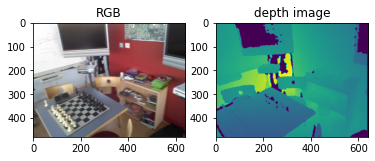

In [18]:
plt.subplot(1, 2, 1)
plt.title('RGB')
plt.imshow(rgbd_image.color)
plt.subplot(1, 2, 2)
plt.title('depth image')
plt.imshow(rgbd_image.depth)
plt.show()

The RGBD image can be converted into a point cloud, given a set of camera parameters.

In [19]:
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(
    rgbd_image,
    o3d.camera.PinholeCameraIntrinsic(
        o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault))
# Flip it, otherwise the pointcloud will be upside down
pcd.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])


PointCloud with 274095 points.

In [20]:
o3d.visualization.draw_geometries([pcd])

## Creating ply only from depth image

In [4]:
pcd2 = o3d.geometry.PointCloud.create_from_depth_image(
    depth_raw,
    o3d.camera.PinholeCameraIntrinsic(
        o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault),
    depth_trunc=3.5
)
pcd2.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])

PointCloud with 208981 points.

In [6]:
o3d.visualization.draw_geometries([pcd2])

In [13]:
o3d.io.write_point_cloud("pcd.ply", pcd2,write_ascii=False,compressed=True,print_progress=True)

True